#### Note that this case study is not designed to teach you Python coding. You can ignore the code if you do this independently (in class, we will discuss it without going in detail) - you will learn to code better than what is shown in this notebook by the end of the quarter.

The goal of this lecture is to: 
- discuss data science concepts
- preview some of the methods/code/algorithms you will learn in DATA 11800-11900
- illustrate how a data science project is a lot more than just programming

## Classification algorithms (will cover in DATA 11900)

- **Machine Learning**: studies how to automatically learn (build models) from experience (and data); one of the main goals is to make accurate predictions.
- **Classification**: prediction of a categorical response.

<br>
<div>
<img src="flow.png" width="600"/>
</div>
<br> 

**Examples of classification problems:**
- Disease prediction (from clinical and molecular data)
- Computer vision (e.g., face detection, handwriting recognition)
- Voice recognition
- Fraud detection 
- Text classification (e.g., spam detection)
- Credit scoring
- Market segmentation (e.g., predict if client will respond to promotion)

**Classification**
- based on features/attributes/predictors 
- needd a rule (classifier)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

# The Federalist Papers #

<font size=3> The Federalist Papers is a collection of 85 articles and essays written in 1787-1788 by Alexander Hamilton, James Madison, and John Jay under the pseudonym "Publius" to persuade the citizens of the State of New York to ratify the United States Constitution. The first 77 of these essays were published serially in the Independent Journal, the New York Packet, and The Daily Advertiser between October 1787 and April 1788, and then Hamilton wrote an additional eight essays designed to complete the job. From [Wikipedia](https://en.wikipedia.org/wiki/The_Federalist_Papers):</font>


<div>
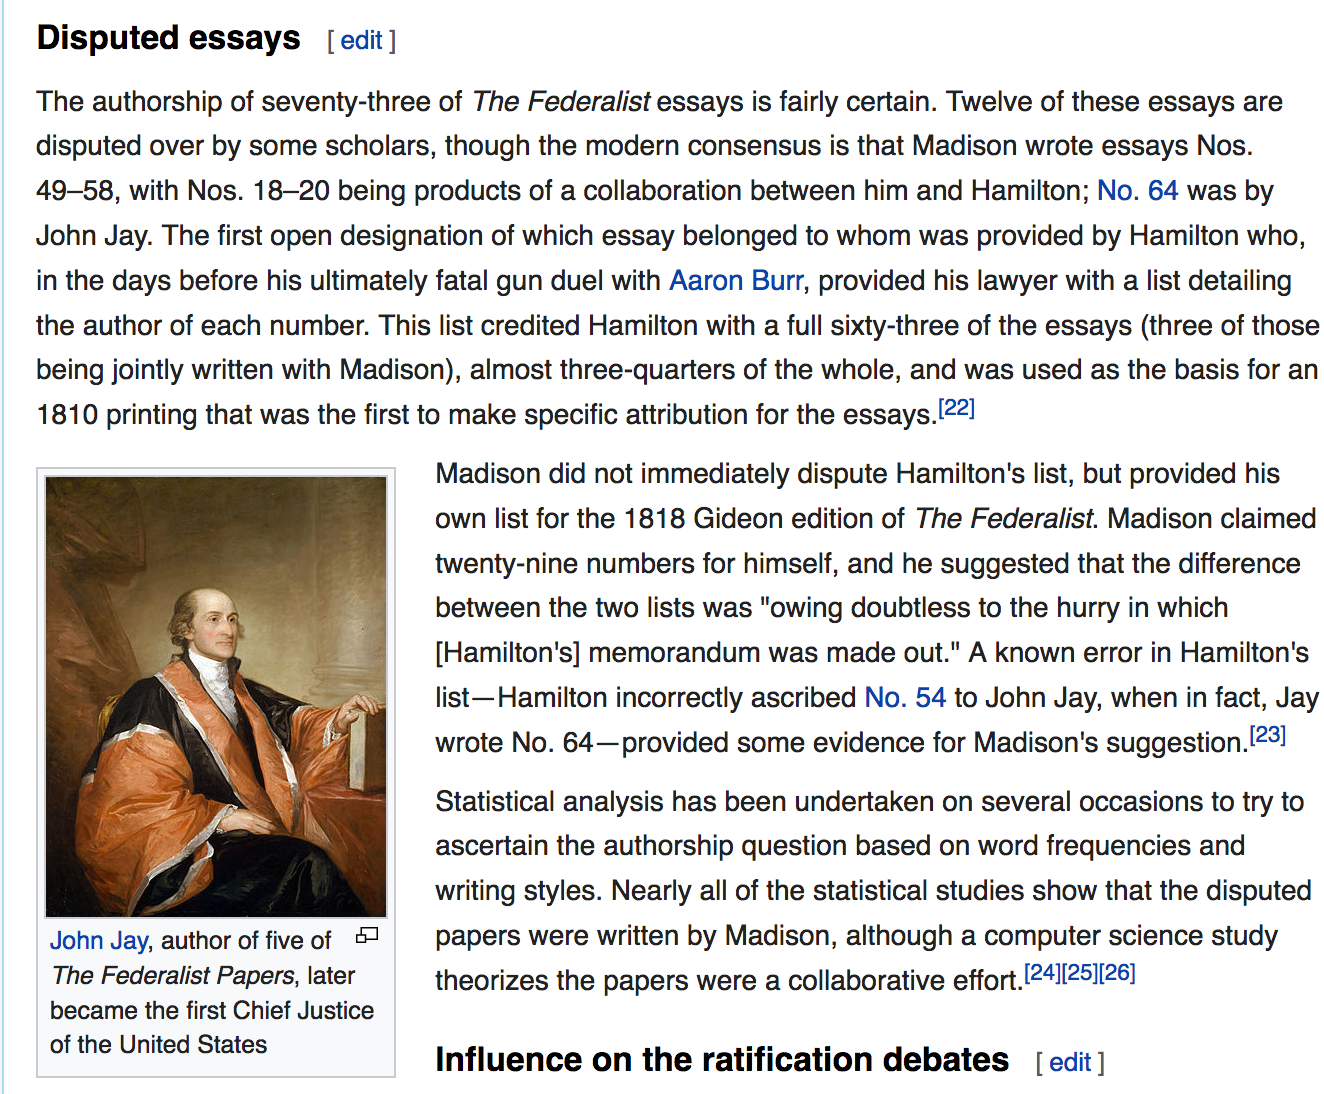
</div>


<br> 

## Authorship: ##

<font size=3> We will focus here on the issue of authorship as shown in the above Wikipedia entry, and as discussed in the 1964 book "Inference & Disputed Authorship: The Federalist" by Frederick Mosteller and David L. Wallace. At that time, the authorship of twelve papers was disputed and the book detailed statistical methods for establishing authorship. It is considered the first published large scale analysis of data using Bayesian methods. We will use illustrate some of the ideas discussed in the book, but we will try to predict authorship using very simple tools. </font>

<br>

<div>
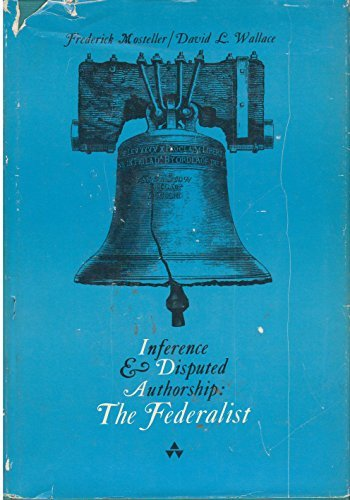
</div>

<br>

<font size=4>The Federalist Papers can be found online at Project Gutenberg: </font> https://www.gutenberg.org/files/1404/1404.txt

 


# The plan for the lecture #
- Read the data, comment on data issues
- Discuss assigning authorship; what information can we use (class discussion)?
- Data exploration
- Making some predictions (if time allows)

## Examples of data types:

- quantitative data (examples: time spent on zoom calls in 2021 for students in 11800, cholesterol levels for a set of subjects);
- categorical data (gender, race); boolean 
- ordinal
- text
- geographical (structured numerical)
- graph/network 
- images 
- sound
- video

# Read the data #

There are many possible formats for data. We will work a lot with structured data that can be read into data tables or data frames. Here we have an example of unstructured data (text). <font color=red>You will learn more about working with text data later in this class and in DATA 11900</font>

In [2]:
# This command reads the content into a (very long) string
federalist_text = read_url('https://www.gutenberg.org/files/1404/1404-0.txt')

In [3]:
# What is the object I constructed?
print(type(federalist_text))
print(len(federalist_text))


<class 'str'>
1164761


In [4]:
# How long?  
print("Input file is ", len(federalist_text), "bytes,",
      len(federalist_text.split(" ")), "words.")

Input file is  1164761 bytes, 195403 words.


In [5]:
# I want to display the first characters in my (very long) string
federalist_text[0:1000]

'\ufeffThe Project Gutenberg eBook of The Federalist Papers, by Alexander Hamilton, John Jay, and James Madison This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook. Title: The Federalist Papers Author: Alexander Hamilton, John Jay, and James Madison Release Date: July, 1998 [eBook #1404] [Most recently updated: December 20, 2021] Language: English Character set encoding: UTF-8 Produced by: The Constitution Society, Anonymous Volunteers and David Widger *** START OF THE PROJECT GUTENBERG EBOOK THE FEDERALIST PAPERS *** THE FEDERALIST PAPERS By Alexander Hamilton, John Jay, and James Madison FEDERALIST No

## Data Collection and Data Cleaning   
<font color=red>(more about this in Lecture 7)</font>

An important part of any data science project is to consider how the data were collected, and what aspects of the data collection process are important for the analysis and for interpretation of results. The data here consist in the collection of characters saved in the Project Gutenberg file. Do you see any issues with the data collection?


<br>

<div>
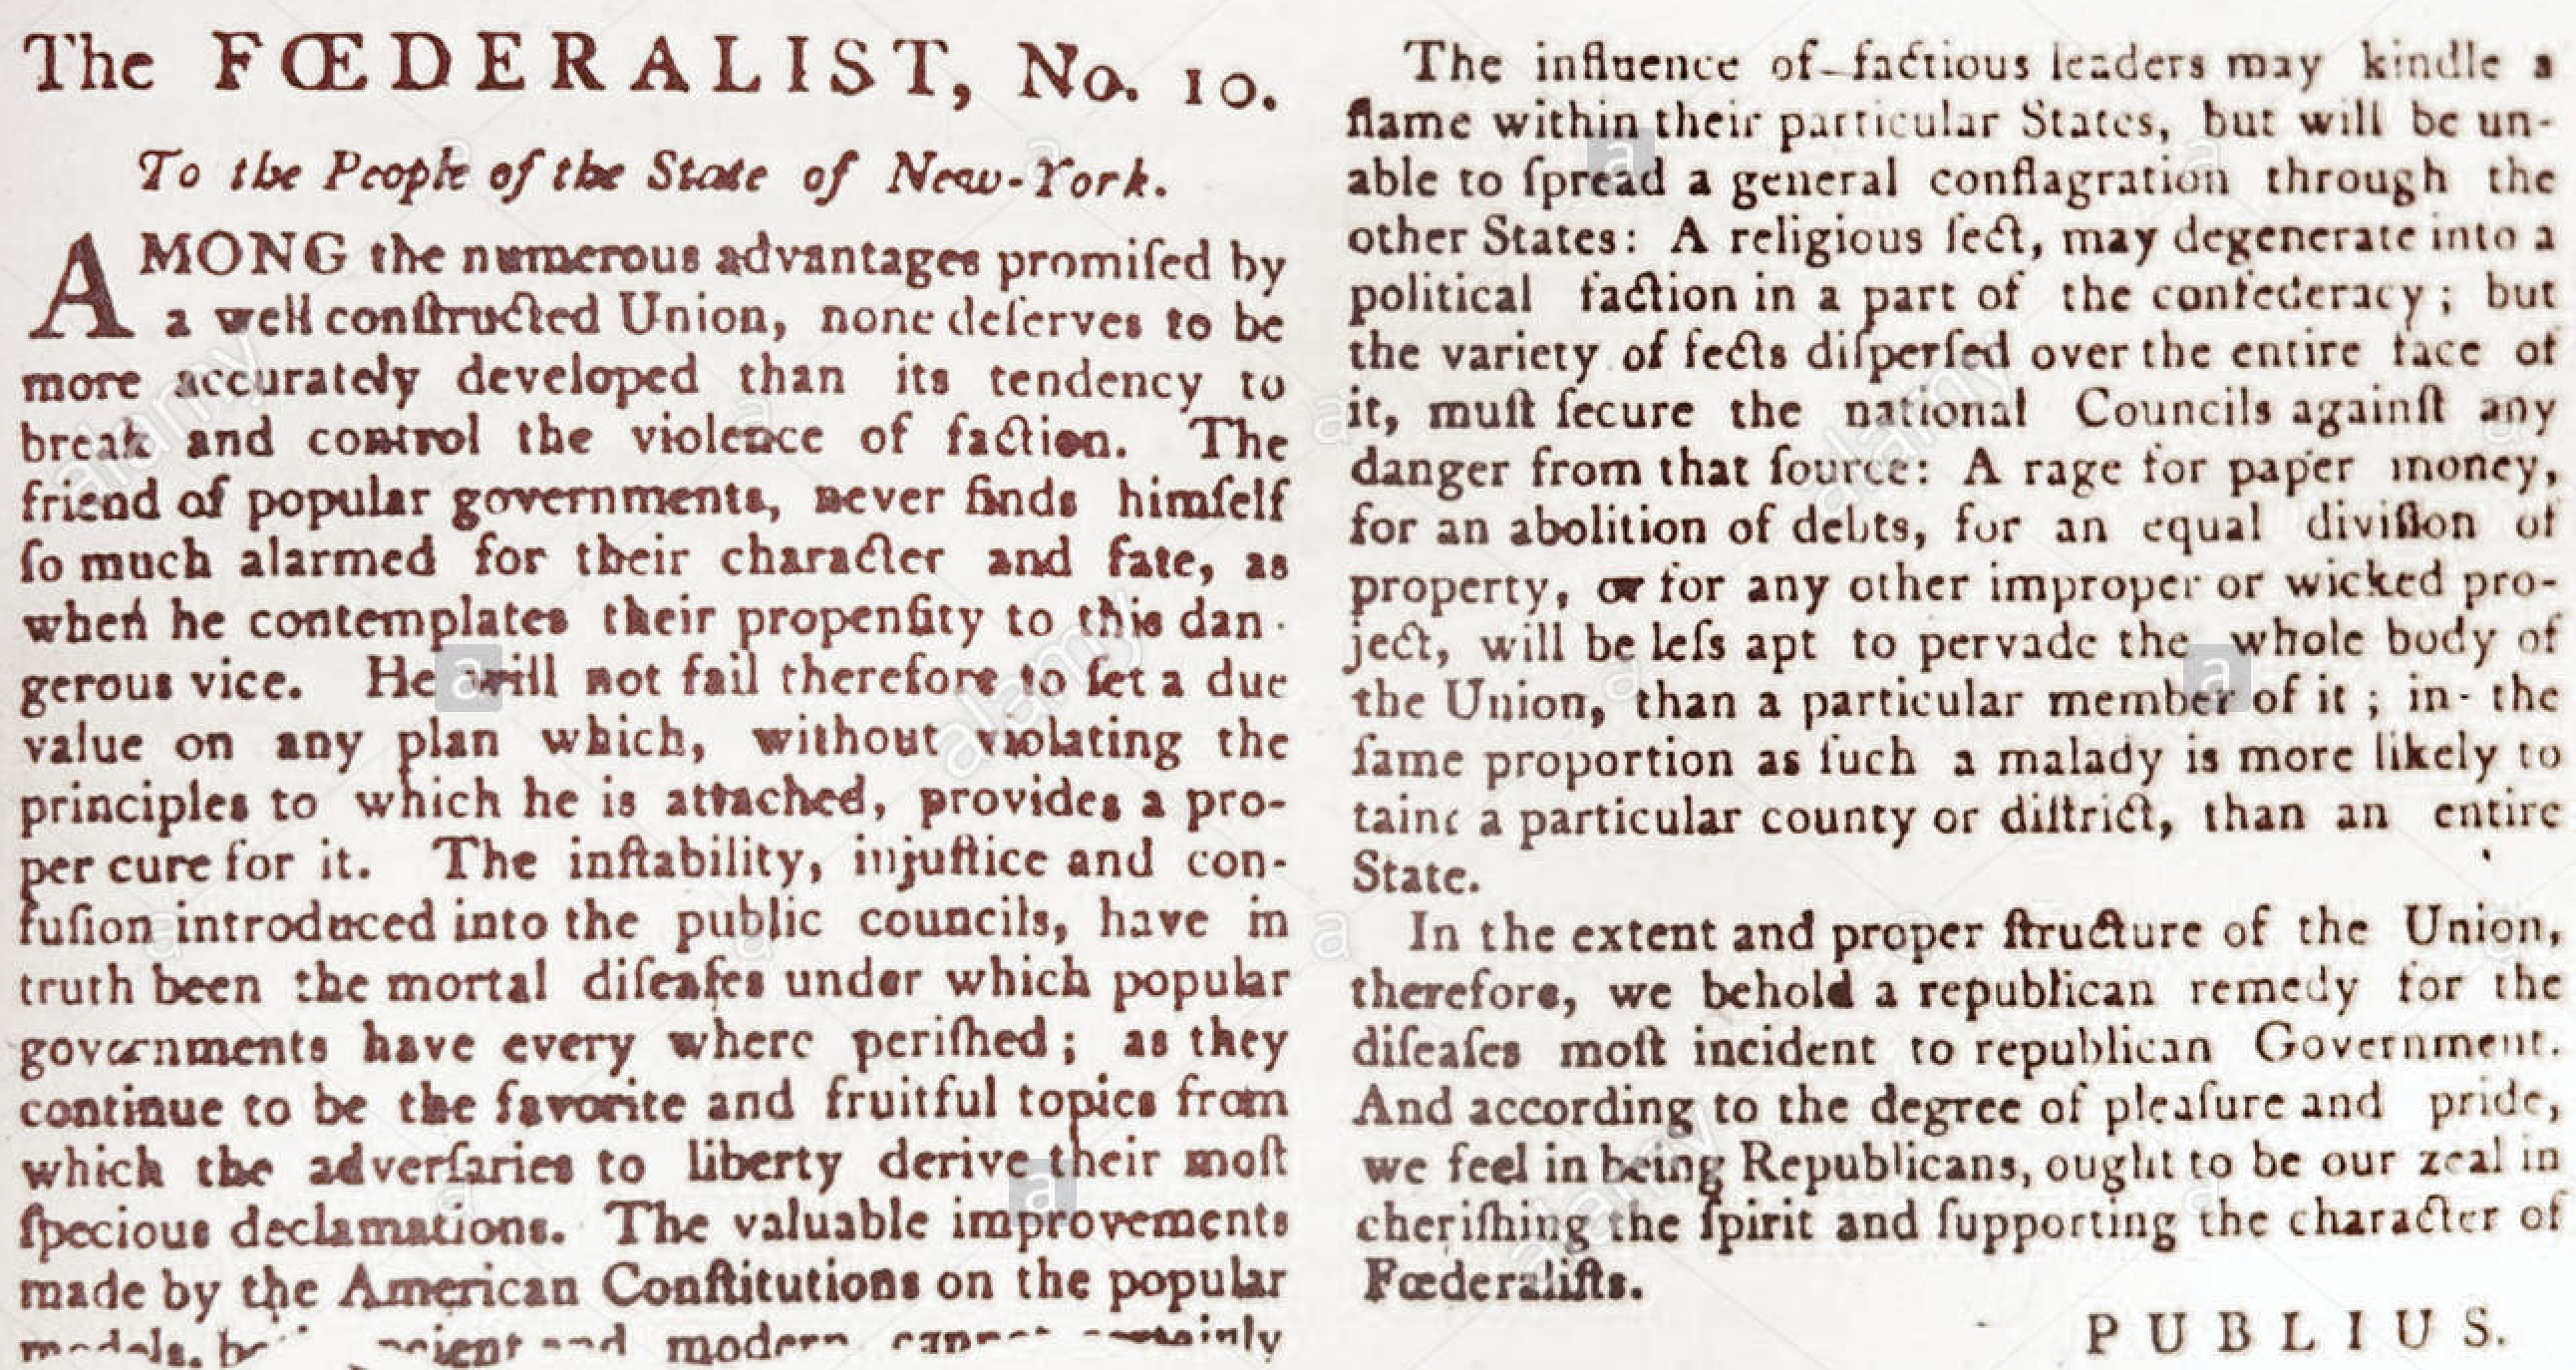
</div>

<br>

### How can we extract the papers from the long string? ###

To parse the text into distinct papers, note that the papers start with "**To the People of the State of New York:**" and end with "**PUBLIUS**". We can use this information to extract the text in each paper.

The text in Gutenberg has some minor issues that can affect the text analysis:
1. FEDERALIST No 15 starts with "To the People of the State of New York." (do you see the difference?)
2. FEDERALIST No. 37 does not end with PUBLIUS. 


We will use the Python command `replace` to address these issues.


In [6]:
federalist_text=federalist_text.replace('To the People of the State of New York.', 
                                        'To the People of the State of New York:')
federalist_text=federalist_text.replace('FEDERALIST No. 38', 'PUBLIUS FEDERALIST No. 38')

### Divide the text into papers

We take advantage of the common start (**To the People of the State of New York:**) and common end (**Publius**) for all the papers - it allows us to design a scheme for extracting the text of each paper out.

We want to use the Python command `split` that splits a string into a list for a given separator. If we would use a space separator - it would give us a list of all words in the document. We do it in two steps:

-  We replace `To the People of the State of New York:` with `PUBLIUS`

-  We split the string list using the `PUBLIUS` delimiter. Note that we obtain 170 strings. **Can you tell what are these 170 strings?**



In [7]:
federalist_text=federalist_text.replace('To the People of the State of New York:', 'PUBLIUS')

# splitting the long string into a list of strings 
papers_list = federalist_text.split('PUBLIUS')
print(np.shape(papers_list))

# printing the first 50 characters in first few of the "papers_list" list
for i in papers_list[0:10]: print(i[:50])

(171,)
﻿The Project Gutenberg eBook of The Federalist Pap
 AFTER an unequivocal experience of the inefficacy
 1. The same idea, tracing the arguments to their 
 WHEN the people of America reflect that they are 
 FEDERALIST No. 3 The Same Subject Continued (Conc
 IT IS not a new observation that the people of an
 FEDERALIST No. 4 The Same Subject Continued (Conc
 MY LAST paper assigned several reasons why the sa
 FEDERALIST No. 5 The Same Subject Continued (Conc
 QUEEN ANNE, in her letter of the 1st July, 1706, 


### Slicing a list ###

Note that we have 171 strings in our list: 85 are the papers and the rest are the texts in between them. So we want to get specific sets of sub-elements from our list. Python has many ways you can do that - it is that called slicing. 

Will run these below, but what do you think the following commands will yield?
- papers_list[0]
- papers_list[1:3]
- papers_list[:3]
- papers_list[1:4:2] (slicing with increments)

In [8]:
# it is easier to exemplify using a simpler object
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numbers[0]

1

In [9]:
# This command will extract the papers
papers=papers_list[1:171:2]
np.shape(papers)

(85,)

In [10]:
# It is a good idea to verify if output is what is expected
# We print the first 80 characters in each string of the "papers" list
for i in papers: print(i[:80])

 AFTER an unequivocal experience of the inefficacy of the subsisting federal gov
 WHEN the people of America reflect that they are now called upon to decide a qu
 IT IS not a new observation that the people of any country (if, like the Americ
 MY LAST paper assigned several reasons why the safety of the people would be be
 QUEEN ANNE, in her letter of the 1st July, 1706, to the Scotch Parliament, make
 THE three last numbers of this paper have been dedicated to an enumeration of t
 IT IS sometimes asked, with an air of seeming triumph, what inducements could t
 ASSUMING it therefore as an established truth that the several States, in case 
 A FIRM Union will be of the utmost moment to the peace and liberty of the State
 AMONG the numerous advantages promised by a well constructed Union, none deserv
 THE importance of the Union, in a commercial light, is one of those points abou
 THE effects of Union upon the commercial prosperity of the States have been suf
 As CONNECTED with the subje

#### In the above cells, you can see an example of an iteration.
<font color=red>(more about this in Lecture 6)</font>

## Authorship information in 1964

As stated above, the authorship was known for most papers, but disputed for some (in 1964, at the time the book was written). The authorship list is based on the information from the Mosteller and Wallace book. We construct below a table (data frame) that shows this information.

In [11]:
# construct an array that has the authorship information for the 85 papers
authorship=['hamilton'] * 85
disputed=[18,19,20,49,50,51,52,53,54,55,56,57,58,62,63]
madison=[10,14,37,38,39,40,41,42,43,44,45,46,47,48]
jay=[2,3,4,5,64]

# we use again iterations to build the authorship array
for i in disputed: authorship[i-1]='disputed'
for i in jay: authorship[i-1]='jay'
for i in madison: authorship[i-1]='madison'
authorship=np.asarray(authorship)

# display the attributed authorship for each paper in a pandas data frame
pd.DataFrame(
    {"Paper":np.arange(1,86,1),
     "Author":authorship}
            )

Paper    Author
0       1  hamilton
1       2       jay
2       3       jay
3       4       jay
4       5       jay
..    ...       ...
80     81  hamilton
81     82  hamilton
82     83  hamilton
83     84  hamilton
84     85  hamilton

[85 rows x 2 columns]

In [ ]:
for i in 

### Data frames

Starting with <font color=red> Lecture 3</font>, we will learn about reading tabular data and working with *Pandas* environment. 

### Class discussion

We now have for each paper: 
- its text (as a string);
- its author (for all but the 15 "disputed")

**Questions:**
- What information/data/features can be used for predicting authorship?
- How can we predict authorship for the disputed papers? 
- How do we check the performance of our method/algorithm/code?


## Numerical and graphical summaries of data (lectures 4 and 8)

We can start to calculate some simple numerical summaries for each paper: 

  1. The length of paper (number of words).

  2. The number of sentences (how can we do that?).
  
  3. The number of commas (hoping to learn something about sentence structure).
  
  4. We can also calculate more complicated summaries, such as the number of nouns (why is that difficult?).
  
  The function `char.count` in numpy (a library of functions in Python) is useful for counting the numbers of characters in a string.
  
  The function `np.zeros` in numpy returns an array of zeros with the specified size.
  
  *Note: How do you think this was done in the 60's? How did they count words?*

In [12]:
periods=np.char.count(papers,'.')
commas=np.char.count(papers,',')
words=np.zeros(85)
for i in range(85): words[i]=len(papers[i].split())

# display the numbers in a data frame
pd.DataFrame(
    {"Paper":np.arange(1,86,1),
     "Author":authorship,
     "Words":words, 
     "Sentences":periods,
     "Commas":commas}
            ).head(10)


Paper    Author   Words  Sentences  Commas
0      1  hamilton  1583.0         47     103
1      2       jay  1662.0         40     122
2      3       jay  1438.0         37     119
3      4       jay  1626.0         32     125
4      5       jay  1337.0         35      86
5      6  hamilton  2129.0         54     168
6      7  hamilton  2250.0         77     157
7      8  hamilton  1985.0         70     162
8      9  hamilton  1974.0         62     130
9     10   madison  2995.0         79     222

###  There is an error in the way we were counting the number of sentences. 

Do you see it?

In [13]:
periods=np.char.count(papers,'.')+np.char.count(papers,'?')+np.char.count(papers,'!')

# the first 10 rows of the data freame 
pd.DataFrame(
    {"Paper":np.arange(1,86,1),
     "Author":authorship,
     "Words":words, 
     "Sentences":periods,
     "Commas":commas}
            ).head(10)

Paper    Author   Words  Sentences  Commas
0      1  hamilton  1583.0         47     103
1      2       jay  1662.0         43     122
2      3       jay  1438.0         38     119
3      4       jay  1626.0         41     125
4      5       jay  1337.0         39      86
5      6  hamilton  2129.0         70     168
6      7  hamilton  2250.0         82     157
7      8  hamilton  1985.0         71     162
8      9  hamilton  1974.0         62     130
9     10   madison  2995.0         87     222


### Can we use average sentence length to discriminate between Madison and Hamilton?

- This would be an example of a 1-feature classifier.
- We will also explore using two features.
<br>


In [14]:
# here we use the 'comparisons' you learned in Lecture 1
[sum(words[authorship=='hamilton'])/sum(periods[authorship=='hamilton']),
 sum(words[authorship=='madison'])/sum(periods[authorship=='madison']),
 sum(words[authorship=='jay'])/sum(periods[authorship=='jay'])
]

[33.821917808219176, 33.286941580756015, 38.55760368663594]

Thoughts?

### How about length of the paper?

In [15]:
[sum(words[authorship=='hamilton'])/np.sum([authorship=='hamilton']),
 sum(words[authorship=='madison'])/np.sum([authorship=='madison']), 
sum(words[authorship=='jay'])/np.sum([authorship=='jay'])]

[2178.529411764706, 2767.5714285714284, 1673.4]

### Data vizualization will be discussed throughout the class

<font color=red>(starting with Lecture 4)</font>

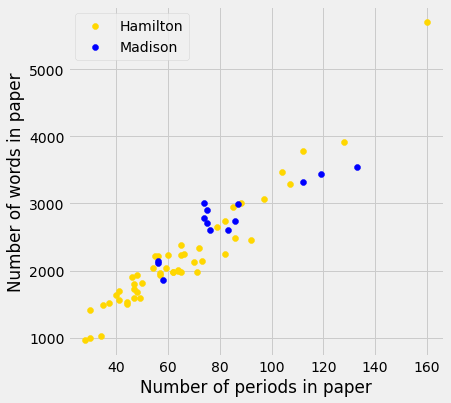

In [16]:
# a scatter plot of some of the variables we constructed
plt.figure(figsize=(6, 6))
plt.scatter(periods[authorship=='hamilton'], 
              words[authorship=='hamilton'], 
              color='gold',label="Hamilton")
plt.scatter(periods[authorship=='madison'], 
              words[authorship=='madison'], 
              color='blue',label="Madison")
plt.xlabel('Number of periods in paper')
plt.ylabel('Number of words in paper')
plt.legend(loc='upper left');

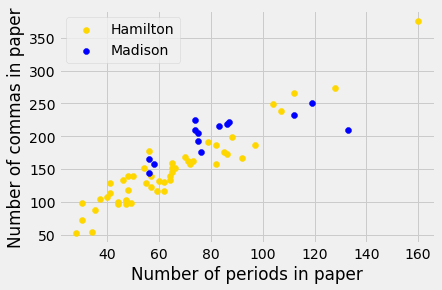

In [17]:
# another scatterplot - note that we are not setting up the size
plt.scatter(periods[authorship=='hamilton'], 
              commas[authorship=='hamilton'], 
              color='gold',label="Hamilton")
plt.scatter(periods[authorship=='madison'], 
              commas[authorship=='madison'], 
              color='blue',label="Madison")
plt.xlabel('Number of periods in paper')
plt.ylabel('Number of commas in paper')
plt.legend(loc='upper left');
plt.show();


## The next step in our analysis is to look at the frequency of various words and determine if they are good predictors of authorship ##

We will use again the `split` function. Several steps are needed:

- We need to strip punctuation (so *world;* becomes *world*). We will use the function `replace`.
- Make all lower case words (*after* and *AFTER* will be the same after this). We will use the function `lower`.
- This will allow us to count words accurately.



In [18]:
# Keeping a copy of the original 'papers' list
orig_papers=papers

# Strip out punctuation so that we get bare words
for i in range(0,85): 
    papers[i]=papers[i].lower()
    papers[i]=papers[i].replace('.','')
    papers[i]=papers[i].replace(',','')
    papers[i]=papers[i].replace(';','')
    papers[i]=papers[i].replace(':','')


## Important words ##

 Early work focused on average sentence length and sentence length variability with little success. About 1959, Douglass Adair informed Mosteller that he had found a pair of words that distinguished Hamilton and Madison: 'while' and 'whilst'. Let's investigate them.


In [19]:
# the 'while' counts array
wh1=np.zeros(85)
for i in range(85): wh1[i]=sum(np.asarray(papers[i].split())=='while')

# the 'whilst' counts array
wh2=np.zeros(85)
for i in range(85): wh2[i]=sum(np.asarray(papers[i].split())=='whilst')

# a data frame (called df1) with the counts and authorship
df1= pd.DataFrame(
    {'Paper No.':np.arange(1,86,1),
         'Author': authorship,                
        'While': wh1,
        'Whilst': wh2}       
            )

df1[df1.While>0]

Paper No.    Author  While  Whilst
1           2       jay    1.0     0.0
5           6  hamilton    1.0     0.0
8           9  hamilton    1.0     0.0
14         15  hamilton    1.0     0.0
20         21  hamilton    3.0     0.0
21         22  hamilton    4.0     0.0
23         24  hamilton    1.0     0.0
28         29  hamilton    2.0     0.0
33         34  hamilton    1.0     0.0
63         64       jay    1.0     0.0
64         65  hamilton    1.0     0.0
65         66  hamilton    1.0     0.0
68         69  hamilton    1.0     0.0
69         70  hamilton    2.0     0.0
70         71  hamilton    1.0     0.0
71         72  hamilton    2.0     0.0
74         75  hamilton    5.0     0.0
75         76  hamilton    1.0     0.0
76         77  hamilton    1.0     0.0
80         81  hamilton    2.0     1.0
82         83  hamilton    4.0     0.0
83         84  hamilton    1.0     0.0

In [20]:
df1[df1.Whilst>0]

Paper No.    Author  While  Whilst
13         14   madison    0.0     1.0
17         18  disputed    0.0     1.0
18         19  disputed    0.0     1.0
36         37   madison    0.0     1.0
37         38   madison    0.0     2.0
40         41   madison    0.0     1.0
42         43   madison    0.0     1.0
43         44   madison    0.0     2.0
44         45   madison    0.0     2.0
45         46   madison    0.0     2.0
48         49  disputed    0.0     1.0
50         51  disputed    0.0     2.0
52         53  disputed    0.0     1.0
55         56  disputed    0.0     1.0
56         57  disputed    0.0     3.0
62         63  disputed    0.0     1.0
80         81  hamilton    2.0     1.0

## Other words ##

As it is now clear that we cannot use only 'while' and 'whilst' to predict authorship, let's look at two other words and investigate their discrimination ability.

<font color=red>(you will learn about histograms in Lecture 4)</font>


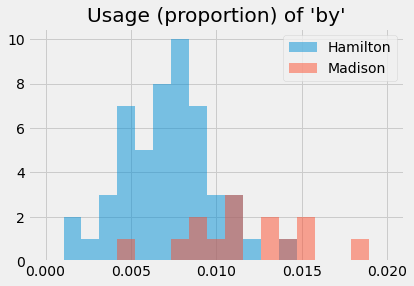

In [21]:
# investigate the frequency of "by"
tmp=np.zeros(85)
for i in range(85): tmp[i]=sum(np.asarray(papers[i].split())=='by')
    
h=(tmp/words)[authorship=='hamilton']
m=(tmp/words)[authorship=='madison']

bins = np.linspace(0, 0.02, 20)

plt.hist(h, bins, alpha=0.5, label='Hamilton')
plt.hist(m, bins, alpha=0.5, label='Madison')
plt.legend(loc='upper right')
plt.title("Usage (proportion) of 'by'")
plt.show()

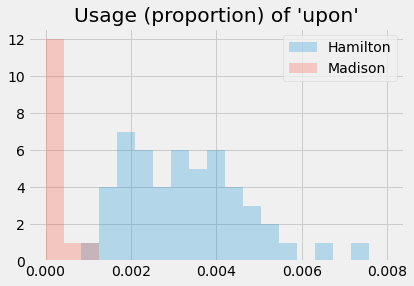

In [22]:
# investigate the frequency of "upon"
tmp=np.zeros(85)
for i in range(85): tmp[i]=sum(np.asarray(papers[i].split())=='upon')
h=(tmp/words)[authorship=='hamilton']
m=(tmp/words)[authorship=='madison']
d=(tmp/words)[authorship=='disputed']

bins = np.linspace(0, 0.008, 20)

plt.hist(h, bins, alpha=0.25, label='Hamilton')
plt.hist(m, bins, alpha=0.25, label='Madison')
#plt.hist(d, bins, alpha=0.25, label='disputed', color="green")

plt.legend(loc='upper right')
plt.title("Usage (proportion) of 'upon'")
plt.show()

### Using word frequency for prediction 

It is clear that many words are useful for predicting authorship. Later in the class we will learn how to identify words that are significantly different in frequency between Hamiltom and Madison, and can be useful in prediction <font color=red>(see Lectures 11 and 12)</font>.

For the moment, we will use a naive approach that relies on accumulating evidence from many sources. We will take the 150 most common words and use their frequencies for prediction.

**One name for what we are doing next: feature extraction and engineering.**

In [23]:
from collections import Counter
tmp=[None]   ## I am constructing the union of all papers
for i in range(85): tmp=tmp+papers[i].split()
print(len(tmp))
# Display the 10 most common words
print(Counter(tmp).most_common(10))

topwords=Counter(tmp).most_common(150)
topwords=np.asarray(topwords)
topwords=topwords[:,0]

# to see the ordered list of most frequent words
topwords

187844
[('the', 17415), ('of', 11550), ('to', 6908), ('and', 5054), ('in', 4400), ('a', 3956), ('be', 3797), ('that', 2737), ('it', 2511), ('is', 2165)]


array(['the', 'of', 'to', 'and', 'in', 'a', 'be', 'that', 'it', 'is',
       'which', 'by', 'as', 'this', 'would', 'have', 'will', 'or', 'for',
       'not', 'their', 'with', 'from', 'are', 'on', 'an', 'they',
       'states', 'may', 'government', 'been', 'all', 'but', 'state',
       'its', 'other', 'power', 'has', 'more', 'at', 'if', 'than', 'any',
       'one', 'them', 'people', 'no', 'those', 'can', 'there', 'we',
       'these', 'constitution', 'must', 'who', 'such', 'so', 'most',
       'upon', 'i', 'his', 'should', 'union', 'every', 'national', 'same',
       'against', 'was', 'might', 'federal', 'under', 'our', 'were',
       'into', 'only', 'great', 'had', 'authority', 'public', 'some',
       'ought', 'general', 'shall', 'powers', 'time', 'executive',
       'between', 'united', 'each', 'could', 'men', 'less', 'what',
       'part', 'new', 'members', 'body', 'number', 'first', 'particular',
       'us', 'different', 'two', 'he', 'legislative', 'without', 'laws',
       'very'

Text(0, 0.5, 'word count')

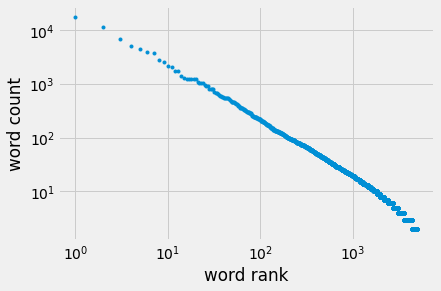

In [24]:
### Zipf's law

# Zipf's law is the observation that the numbers of occurrances of words tends
# to fall as a power of the word's rank.  It makes pretty pictures, but they 
# tend not to be very useful.

top5kwords=Counter(tmp).most_common(5000)
wordlabels = [word for word, rank in top5kwords]
ranks = [rank for word, rank in top5kwords]
plt.loglog(np.arange(len(ranks))+1, ranks,'.')
plt.xlabel("word rank")
plt.ylabel("word count")

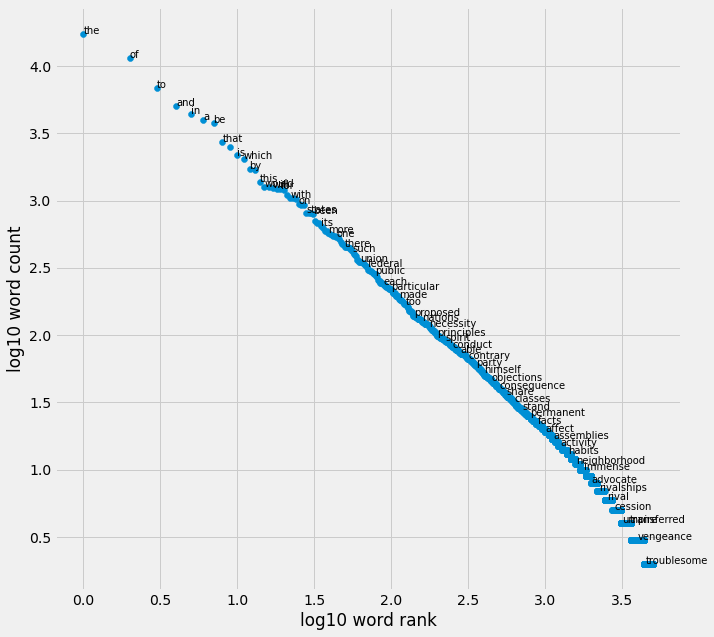

In [25]:
# We can make the plot more expressive by putting labels on the dots, since each
# dot is a word.  Because of flaws in matplotlib, we have to use ugly log10 axes here.

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.log10(np.arange(len(ranks))+1), np.log10(ranks))

ax.set_xlabel("log10 word rank")
ax.set_ylabel("log10 word count")
selected = np.floor(np.power(10,np.arange(1,80)/20)-1)
for i, word in enumerate(top5kwords):
    if i in selected:
        ax.text(np.log10(i+1), np.log10(ranks[i]), word[0],  fontsize=10)
        #ax.text(i, np.log10(ranks[i]), np.log10(word[0]),  fontsize=10) #,transform=ax.transAxes)

In [26]:
top5kwords[0:10]

[('the', 17415),
 ('of', 11550),
 ('to', 6908),
 ('and', 5054),
 ('in', 4400),
 ('a', 3956),
 ('be', 3797),
 ('that', 2737),
 ('it', 2511),
 ('is', 2165)]

In [27]:
# Are the words we discussed so far in the list we created?
[sum(topwords=="while"),sum(topwords=="whilst"),sum(topwords=="by"),sum(topwords=="upon")]

[0, 0, 1, 1]

# Authorship prediction

We are now ready to investigate the authorship of the disputed papers. To do this, we will weigh the evidence from the  frequency of the words. The assumption that we will use is that a 'Hamilton' paper will have a more similar usage of the top words (as measured by their frequency) than a 'Madison' paper.

### Calculate numerical summaries for each of the top words
- For a given disputed paper, let's say Number 49, we will calculate the frequency of each of the top 150 words and call that $f_{49}$

- The frequency among all words in Hamilton's papers: $f_h$.

- The frequency among all words in Madison's papers: $f_m$.

- The overall frequencies (all papers) are $f_o$ 

The distances $d(f_{49},f_h)$ and $d(f_{49},f_m)$ could inform us which author is more likely ("more likely" is reflected in a small difference).

We will use a couple of approaches for classifiying papers.



## k-Nearest Neighbors

- based on word frequencies (these are the features)
- we need a distance
- we need to specify k

Proposed distance between papers i and j:
$$ \sum_{\rm words} \frac{(f_i-f_j)^2}{f_o}$$

Note that the distance above is inspired from the goodness-of-fit $\chi^2$ distance you might have seen (or will see) in a Statistics course.


In [28]:
# create the array where we save the frequencies
freqs_array=np.zeros((85,150))

# a double iteration: why is it so slow?
for i in range(85):
    for j in range(150):
        freqs_array[i,j]=sum(np.asarray(papers[i].split())==topwords[j])/words[i]


# frequencies in each of the author papers (f_h, f_m) and overall (f_o)
f_o=np.zeros(150)
for j in range(150): f_o[j]=sum(freqs_array[:,j]*words)/sum(words)

f_h=np.zeros(150)
for j in range(150): f_h[j]=sum(freqs_array[authorship=='hamilton',j]*\
                     words[authorship=='hamilton'])/sum(words[authorship=='hamilton'])

f_m=np.zeros(150)
for j in range(150): f_m[j]=sum(freqs_array[authorship=='madison',j]*\
                     words[authorship=='madison'])/sum(words[authorship=='madison'])

Text(0, 0.5, 'Word frequencies in Madison papers')

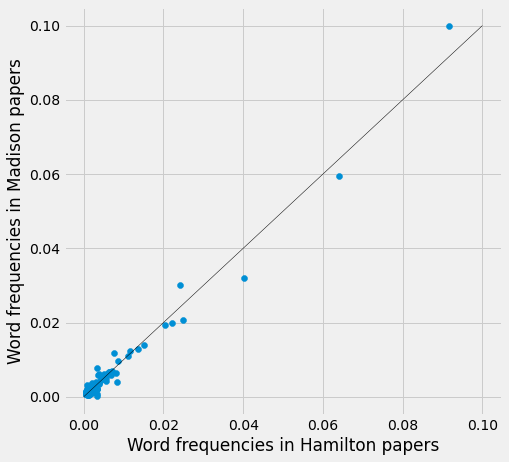

In [29]:
# can we see a distinct difference in word frequencies?
plt.figure(figsize=(7, 7))
plt.scatter(f_h, f_m)
plt.plot([0,0.1], [0,0.1], color='k', linestyle='-',linewidth=0.5)
plt.xlabel('Word frequencies in Hamilton papers')
plt.ylabel('Word frequencies in Madison papers')


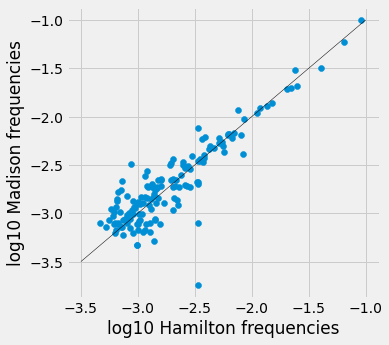

In [30]:
# same plot on logarithmic scale
plt.figure(figsize=(5, 5))
plt.scatter(np.log10(f_h), np.log10(f_m))
plt.plot([-3.5,-1], [-3.5,-1], color='k', linestyle='-',linewidth=0.5)
plt.xlabel('log10 Hamilton frequencies')
plt.ylabel('log10 Madison frequencies')
plt.show()

Text(0, 0.5, 'Madison frequencies')

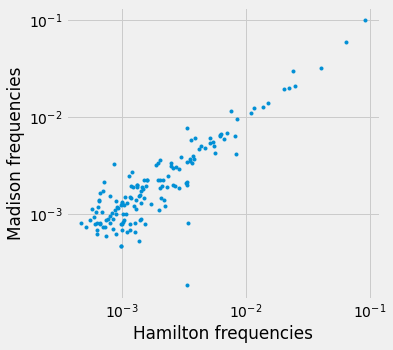

In [31]:
# same plot on logarithmic scale with logrithmic axis labels
plt.figure(figsize=(5, 5))
plt.loglog(f_h, f_m,'.')
plt.plot([-3.5,-1], [-3.5,-1], color='k', linestyle='-',linewidth=0.5)
plt.xlabel('Hamilton frequencies')
plt.ylabel('Madison frequencies')


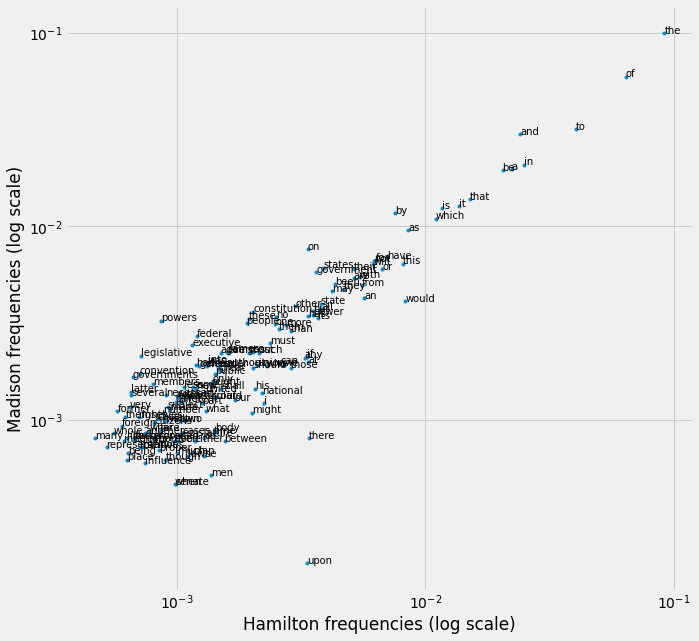

In [32]:
# same plot on logarithmic scale
fig, ax = plt.subplots(figsize=(10, 10))
ax.loglog(f_h, f_m,'.')
ax.plot([-3.5,-1], [-3.5,-1], color='k', linestyle='-',linewidth=0.5)
ax.set_xlabel('Hamilton frequencies (log scale)')
ax.set_ylabel('Madison frequencies (log scale)')
for i, word in enumerate(topwords):
    ax.annotate( word, (f_h[i], f_m[i]), fontsize=10)

In [33]:
# in order to calculate the distances with the methods below,  scale them accordingly
for i in range(85): freqs_array[i,:]=freqs_array[i,:]/(f_o**0.5)

# we will train the algorithm on the known Hamilton and Madison papers
Xtrain=freqs_array[(authorship=='hamilton') + (authorship=='madison'),:]
Ytrain=authorship[(authorship=='hamilton') + (authorship=='madison')]

In [34]:
# K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xtrain, Ytrain) 

KNeighborsClassifier(n_neighbors=1)

In [35]:
# show the prediction results for the disputed papers
results_df=pd.DataFrame(
           {"Paper":np.arange(1,86,1),
            "Author":authorship,
            "Classification":neigh.predict(freqs_array[0:,])})
            

results_df[results_df.Author=="disputed"]
#results_df

Paper    Author Classification
17     18  disputed       hamilton
18     19  disputed       hamilton
19     20  disputed        madison
48     49  disputed       hamilton
49     50  disputed       hamilton
50     51  disputed        madison
51     52  disputed        madison
52     53  disputed       hamilton
53     54  disputed        madison
54     55  disputed       hamilton
55     56  disputed       hamilton
56     57  disputed        madison
57     58  disputed        madison
61     62  disputed        madison
62     63  disputed       hamilton

In [36]:
# And who did we find? 
results_df[results_df.Author=="disputed"]["Classification"].value_counts()

hamilton    8
madison     7
Name: Classification, dtype: int64


## Issues

- should we have used more than 150 words? Less?
- does the discrepancy between the number of papers written by Madison and Hamilton matter?
- does the fact that we use all the words "equally" matter?
- why is this issue not properly accounted by a "machine learning" algorithm?


## Importance of words

We would like to give larger weight to words that are used differently by Madison and Hamilton - we need a measure of the importance of the words. Here are some suggestions for discussion:

$$(f_h - f_m)$$

$$\frac{f_h}{f_m}~~~~{\rm or }~~~~\log \frac{f_h}{f_m} $$ 

$$I=(f_h - f_m) \log \frac{f_h}{f_m}$$

Below we calculate the last of these three for reasons that will become evident when you learn about the likelihood function.

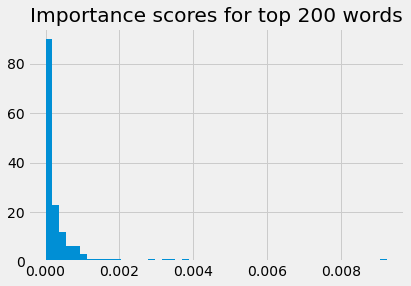

In [37]:
# the I score defined above
Iscore=(f_h-f_m)*np.log(f_h/f_m)

# a histogram of the importance scores
plt.hist(Iscore,bins=50)
plt.title("Importance scores for top 200 words")
plt.show()

In [38]:
importance = pd.DataFrame({"words": topwords, "scores":Iscore})
importance.sort_values("scores", ascending=False).head(10)

words    scores
58          upon  0.009248
49         there  0.003766
24            on  0.003467
83        powers  0.003165
14         would  0.002954
2             to  0.001973
11            by  0.001754
104  legislative  0.001550
3            and  0.001306
69       federal  0.001218

In [39]:
# weigh the frequencies by I
nfreqs_array=np.zeros((85,150))
for i in range(85): nfreqs_array[i,:]=freqs_array[i,:]*(Iscore**0.5)

In [40]:
nXtrain=nfreqs_array[(authorship=='hamilton') + (authorship=='madison'),:]
Ytrain=authorship[(authorship=='hamilton') + (authorship=='madison')]

#kNN with k=1,3,5
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(nXtrain, Ytrain)

results_df=pd.DataFrame(
           {"Paper":np.arange(1,86,1),
            "Author":authorship,
            "Classification":neigh.predict(freqs_array[0:,])})
            
# show the prediction results for the disputed papers
results_df[results_df.Author=="disputed"]

Paper    Author Classification
17     18  disputed        madison
18     19  disputed        madison
19     20  disputed        madison
48     49  disputed        madison
49     50  disputed        madison
50     51  disputed        madison
51     52  disputed        madison
52     53  disputed        madison
53     54  disputed        madison
54     55  disputed        madison
55     56  disputed        madison
56     57  disputed        madison
57     58  disputed        madison
61     62  disputed        madison
62     63  disputed        madison

In [41]:
results_df[results_df.Author=="disputed"]["Classification"].value_counts

<bound method IndexOpsMixin.value_counts of 17    madison
18    madison
19    madison
48    madison
49    madison
50    madison
51    madison
52    madison
53    madison
54    madison
55    madison
56    madison
57    madison
61    madison
62    madison
Name: Classification, dtype: object>

### Principal Component Analysis for Data Visualization

- the frequency data we constructed is 150-dimensional
- we know how to plot 2-dimensional data (e.g., frequency of 2 words) 
- it is not very challenging to visualize 3-d data (we'll show later in the course)
- we need a "dimensionality reduction" algorithm that projects data in a high dimensiom to 2

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PrincipalComponents = pca.fit_transform(nfreqs_array)

PCA_df=pd.concat([pd.DataFrame({"Paper":np.arange(1,86,1),"Author":authorship}),
           pd.DataFrame(data = PrincipalComponents,columns = ['PC1','PC2'])],
          axis=1)
PCA_df.head(10)

Paper    Author       PC1       PC2
0      1  hamilton -0.002176 -0.000808
1      2       jay  0.004520 -0.003969
2      3       jay  0.005008 -0.004037
3      4       jay  0.003165 -0.004821
4      5       jay -0.001970 -0.003875
5      6  hamilton -0.000844 -0.002189
6      7  hamilton -0.008721 -0.000029
7      8  hamilton -0.001349 -0.001049
8      9  hamilton  0.000019 -0.001607
9     10   madison  0.004310 -0.003483

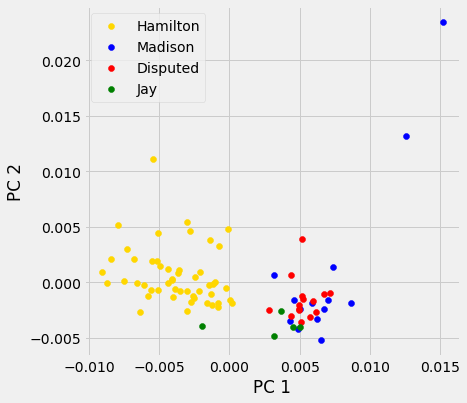

In [43]:
# a scatter plot of some of the variables we constructed
plt.figure(figsize=(6, 6))
plt.scatter(PCA_df.PC1[authorship=='hamilton'], 
              PCA_df.PC2[authorship=='hamilton'], 
              color='gold',label="Hamilton")
plt.scatter(PCA_df.PC1[authorship=='madison'], 
              PCA_df.PC2[authorship=='madison'], 
              color='blue',label="Madison")
plt.scatter(PCA_df.PC1[authorship=='disputed'], 
              PCA_df.PC2[authorship=='disputed'], 
              color='red',label="Disputed")
plt.scatter(PCA_df.PC1[authorship=='jay'], 
              PCA_df.PC2[authorship=='jay'], 
              color='green',label="Jay")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')

In [44]:
PCA_df[PCA_df.PC2>0.01]

Paper    Author       PC1       PC2
46     47   madison  0.015206  0.023412
47     48   madison  0.012586  0.013171
72     73  hamilton -0.005464  0.011072

### It is clear that there are many questions we have not addressed. ###

1. How certain are we about the prediction? What can we do to address this issue? **Topics around uncertainty, accuracy, error will be central in 118-119.**


2. How can we improve the prediction accuracy? Obviously we can find and use other words that discriminate well, such as 'while' and 'whilst'. What else?



## Sentiment analysis

Sentiment analysis is a set of Natural Language Processing (NLP) techniques that takes a document and extracts the opinions present in the text.

One objective is to take the text and produce a label that summarizes the sentiment of this text: positive, neutral, negative. Possible applications:
- online reviews of products
- movie, restaurants, hotels reviews
- news
- tweets analysis

There are numerous methods and dictionaries that exist for evaluating the opinion or emotion in text. One way to analyze the sentiment of a text is to consider the sentiment content of the whole text as the sum of the sentiment content of the individual words. We will use this approach here by counting the number of positive and negative words in each paper - the goal is to see if their frequency is a good predictor of authorship.

We will use a lexicon (a list of positive and negative words) downloaded from here:
https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html


In [47]:
positive=open("./data/positive-words.txt").read().split()
negative=open("./data/negative-words.txt",encoding="latin-1").read().split()
print(positive[0:10])
print(negative[0:10])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [48]:
# this is a function that counts matches in two lists of words
def number_of_duplicates(list_a, list_b):
    count_a = Counter(list_a)
    count_b = Counter(list_b)
    common_keys = set(count_a.keys()).intersection(count_b.keys())
    return sum(min(count_a[key], count_b[key]) for key in common_keys)

In [49]:
number_of_duplicates(papers[0].split(),papers[1].split())

865

In [50]:
# the number of positive and negative words in the first paper
[number_of_duplicates(papers[0].split(),positive),number_of_duplicates(papers[0].split(),negative)]

[51, 52]

In [51]:
# calculate the number of positive and negative words in each paper
words_pos=np.zeros(85)
for i in range(85): words_pos[i]=number_of_duplicates(papers[i].split(),positive)

words_neg=np.zeros(85)
for i in range(85): words_neg[i]=number_of_duplicates(papers[i].split(),negative)



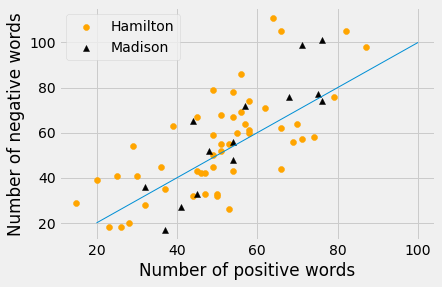

In [52]:
# the shown line is the y=x line
plt.scatter(words_pos[authorship=='hamilton'], 
              words_neg[authorship=='hamilton'], 
              color='orange',label="Hamilton")
plt.scatter(words_pos[authorship=='madison'], 
              words_neg[authorship=='madison'], 
              color='black',marker="^",label="Madison")
plt.plot([20,100],[20,100],linewidth=1.0)
plt.xlabel('Number of positive words')
plt.ylabel('Number of negative words')
plt.legend(loc='upper left');